# RFM Customer Segmentation
Data source: [KPMG Virtual Internship](https://www.theforage.com/virtual-internships/theme/m7W4GMqeT3bh9Nb2c/KPMG-Data-Analytics-Virtual-Internship)

## Dataset

In [1]:
# Import common packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime as dt

In [2]:
# Read in the dataset
data = pd.ExcelFile('KPMG_VI_New_raw_data_update_final.xlsx')
trans = pd.read_excel(data, sheet_name=1, header=1)

In [3]:
# Print out first 5 rows
trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [4]:
# General information
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [5]:
# Change data type
trans[['transaction_id', 'online_order', 'product_id', 'customer_id']] \
= trans[['transaction_id', 'online_order', 'product_id', 'customer_id']].astype(str)

In [6]:
#Convert Excel dates to dates
import xlrd
trans['product_first_sold_date'].fillna(0, inplace=True)
date_tuple = [xlrd.xldate.xldate_as_datetime(x, 0)
              for x in trans['product_first_sold_date'].tolist()]

trans['product_first_sold_date_copy'] = [d.strftime('%m-%d-%Y') for d in date_tuple]
trans['product_first_sold_date_copy'] = np.where(trans['product_first_sold_date'] == 0,
                                                 np.nan,trans['product_first_sold_date_copy'])
trans['product_first_sold_date'] = pd.to_datetime(trans['product_first_sold_date_copy'])
trans.drop('product_first_sold_date_copy',axis=1,inplace=True)

In [7]:
# Date time values overview
trans.describe(include='datetime')

,transaction_date,product_first_sold_date
count,20000,19803
unique,364,100
top,2017-02-14 00:00:00,1992-10-02 00:00:00
freq,82,234
first,2017-01-01 00:00:00,1991-01-21 00:00:00
last,2017-12-30 00:00:00,2016-12-06 00:00:00


In [8]:
# Extract transaction month
trans['transaction_month'] = trans['transaction_date'].dt.month

In [9]:
# Calculate profits
trans['profit'] = trans['list_price'] - trans['standard_cost']
# Numerical values overview
trans.describe()

,list_price,standard_cost,transaction_month,profit
count,20000.000000,19803.000000,20000.000000,19803.000000
mean,1107.829449,556.046951,6.516950,551.950915
std,582.825242,405.955660,3.448914,493.412849
min,12.010000,7.210000,1.000000,4.800000
25%,575.270000,215.140000,4.000000,133.780000
50%,1163.890000,507.580000,7.000000,445.210000
75%,1635.300000,795.100000,10.000000,830.240000
max,2091.470000,1759.850000,12.000000,1702.550000


In [10]:
# Categorical values overview
trans.describe(include=np.object)

,transaction_id,product_id,customer_id,online_order,order_status,brand,product_line,product_class,product_size
count,20000,20000,20000,20000,20000,19803,19803,19803,19803
unique,20000,101,3494,3,2,6,4,3,3
top,7591,0,1068,1.0,Approved,Solex,Standard,medium,medium
freq,1,1378,14,9829,19821,4253,14176,13826,12990


## Sales Monthly KPIs

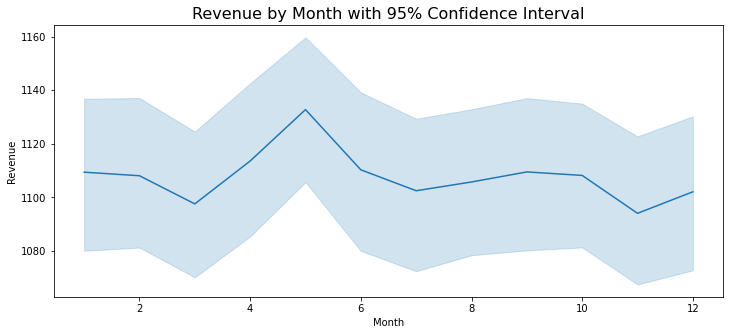

In [11]:
# Plot monthly revenue
fig, ax = plt.subplots(figsize=(12,5))
sns.lineplot(data=trans, x='transaction_month', y='list_price', ax=ax)
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Revenue by Month with 95% Confidence Interval', fontsize=16)
plt.show()

In [12]:
# Create a table of KPIs
kpis = trans.groupby('transaction_month').agg({'transaction_id':'count', 
                                               'list_price':'sum', 'profit':'sum'})
kpis.index.set_names('Month', inplace = True)
kpis.rename(columns={'transaction_id':'Number of Orders', 'list_price':'Total Revenue',
                     'profit':'Total Profit'}, inplace=True)

kpis['Sales Growth (%)'] = kpis['Total Revenue'].pct_change()*100
kpis['Profit Margin (%)'] = kpis['Total Profit']/kpis['Total Revenue']*100
kpis['Average Puchase Value'] = kpis['Total Revenue']/kpis['Number of Orders']
kpis

,Number of Orders,Total Revenue,Total Profit,Sales Growth (%),Profit Margin (%),Average Puchase Value
Month,,,,,,
1,1682,1866059.26,929487.739988,NaN,49.810194,1109.428811
2,1623,1798445.83,870819.060000,-3.623327,48.420644,1108.099710
3,1656,1817617.50,879243.400000,1.066013,48.373401,1097.595109
4,1655,1843009.18,904691.310000,1.396976,49.087727,1113.600713
5,1685,1908723.04,913742.610000,3.565574,47.871933,1132.773318
6,1581,1755400.31,859571.550000,-8.032738,48.967267,1110.310127
7,1717,1892999.67,938619.290000,7.838631,49.583701,1102.504176
8,1749,1933992.35,970452.520000,2.165488,50.178716,1105.770354
9,1572,1744175.53,862290.490000,-9.814766,49.438286,1109.526419


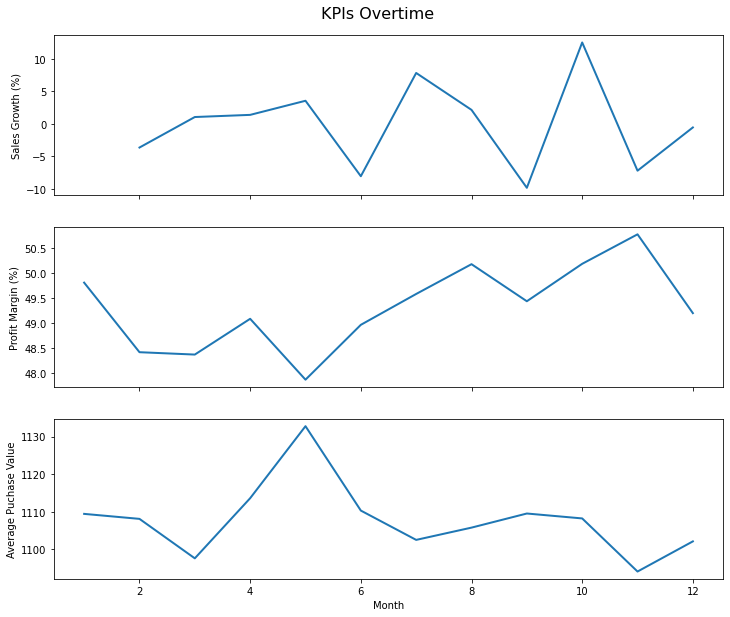

In [13]:
# Plot monthly KPIs
fig, axes = plt.subplots(3,1, figsize=(12,10), sharex=True)
fig.suptitle('KPIs Overtime', y=0.92, fontsize=16)

sns.lineplot(data=kpis, x='Month', y='Sales Growth (%)',
             linewidth=2, ax=axes[0])
sns.lineplot(data=kpis, x='Month', y='Profit Margin (%)',
             linewidth=2, ax=axes[1])
sns.lineplot(data=kpis, x='Month', y='Average Puchase Value',
             linewidth=2, ax=axes[2])
plt.show()

In [14]:
# Create a table of sales growth by brand
kpis_brand = trans.groupby(['brand','transaction_month']).agg({'list_price':'sum'})
kpis_brand.index.set_names(['Brand','Month'], inplace = True)
kpis_brand.rename(columns={'list_price':'Total Revenue'}, inplace=True)

kpis_brand['Sales Growth'] = kpis_brand['Total Revenue'].pct_change()*100
kpis_brand.reset_index(inplace=True)

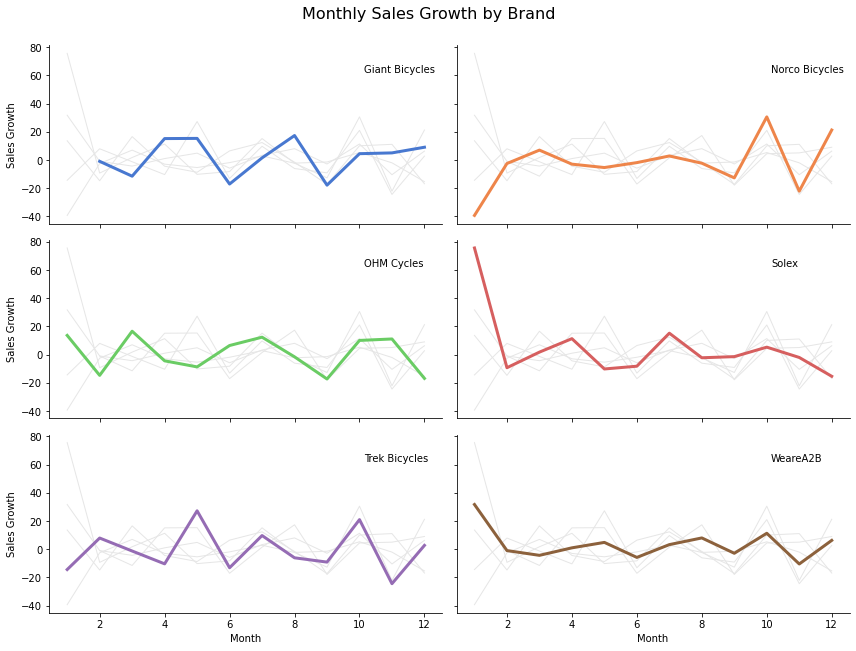

In [35]:
# Plot sales growth by brand
# Reference https://seaborn.pydata.org/examples/timeseries_facets.html
g = sns.relplot(data=kpis_brand, x='Month', y='Sales Growth', col='Brand', hue='Brand',
                kind='line', palette='muted', linewidth=3, zorder=5,
                col_wrap=2, height=3, aspect=2, legend=False)

for brand, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.8, .85, brand, transform=ax.transAxes)

    # Plot every year's time series in the background
    sns.lineplot(data=kpis_brand, x='Month', y='Sales Growth', units='Brand',
                 estimator=None, color='.9', linewidth=1, ax=ax)

g.fig.suptitle('Monthly Sales Growth by Brand', y=1, fontsize=16)
g.set_titles('')
g.tight_layout()
plt.show()

## Segmentation by Recency, Frequency, and Monetary Metrics
### RFM Calculation and Visualization

In [16]:
# Aggregate values to get recency, frequency, and monetary metrics
metrics = trans.groupby('customer_id').agg({'transaction_date':lambda x: (pd.to_datetime('2017-12-31') - x.max()).days,
                                            'transaction_id':'count',
                                            'list_price':'sum'})
metrics.rename(columns={'transaction_date':'recency','transaction_id':'frequency','list_price':'monetary'}, inplace=True)

In [17]:
metrics

,recency,frequency,monetary
customer_id,,,
1,8,11,9084.45
10,34,6,7067.83
100,12,2,2748.20
1000,1,9,10183.70
1001,43,7,6233.51
...,...,...,...
995,12,7,9379.04
996,64,6,7713.16
997,60,7,6397.73


In [18]:
# Descriptive statistics
metrics.describe()

,recency,frequency,monetary
count,3494.000000,3494.000000,3494.000000
mean,61.813681,5.724098,6341.324837
std,57.787120,2.325873,2959.132004
min,1.000000,1.000000,60.340000
25%,18.000000,4.000000,4198.390000
50%,45.000000,6.000000,6026.800000
75%,86.000000,7.000000,8208.837500
max,354.000000,14.000000,19071.320000


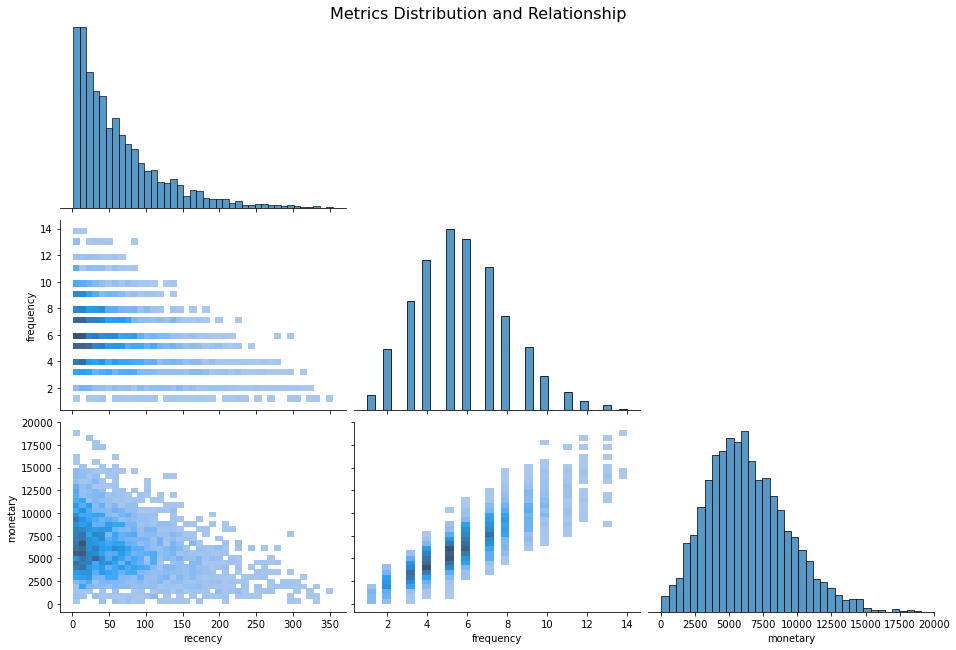

In [19]:
# Pairplot of metrics
g = sns.pairplot(metrics, height=3, aspect=1.5, kind='hist', corner=True)
g.fig.suptitle('Metrics Distribution and Relationship', y=1.08, fontsize=16)
plt.show()

In [20]:
# List price distribution
trans['list_price'].describe()

count    20000.000000
mean      1107.829449
std        582.825242
min         12.010000
25%        575.270000
50%       1163.890000
75%       1635.300000
max       2091.470000
Name: list_price, dtype: float64

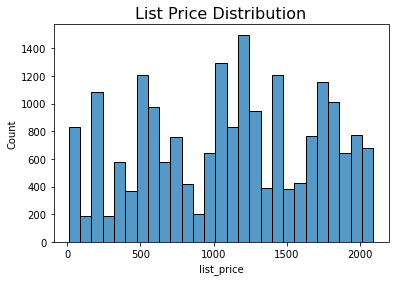

In [43]:
# Plot list price distribution
sns.histplot(data=trans, x='list_price')
plt.title('List Price Distribution', fontsize=16)
plt.show()

In [22]:
# Calculate median ticket per customer
metrics = metrics.join(trans[['customer_id','list_price']].groupby('customer_id').median())
metrics.rename(columns={'list_price':'med_ticket'}, inplace=True)

In [23]:
# Descriptive statistics
metrics['med_ticket'].describe()

count    3494.000000
mean     1123.952384
std       362.623791
min        41.585000
25%       912.165000
50%      1149.345000
75%      1362.990000
max      2091.470000
Name: med_ticket, dtype: float64

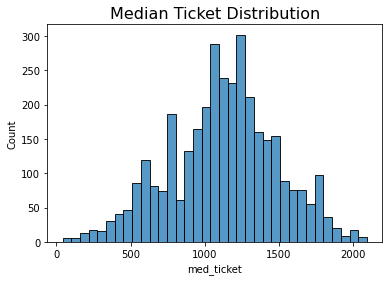

In [44]:
# Plot median ticket distribution
sns.histplot(data=metrics, x='med_ticket')
plt.title('Median Ticket Distribution', fontsize=16)
plt.show()

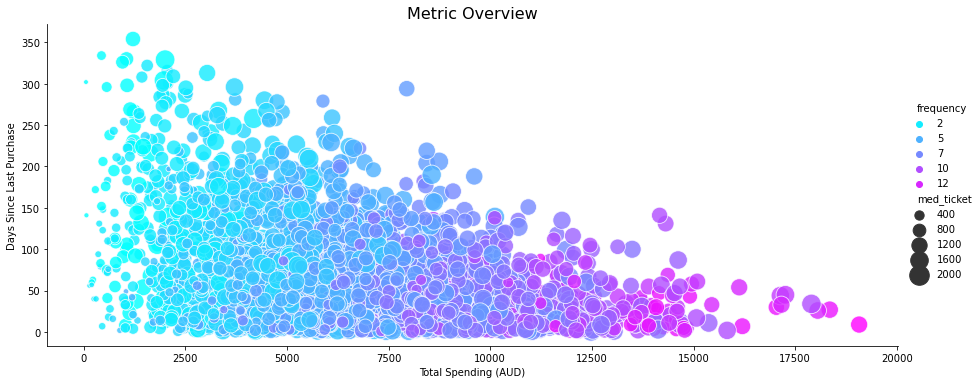

In [25]:
# Scatter plot of recency and monetary, sized by median ticket and colored by frequency
sns.relplot(data=metrics, x='monetary', y='recency', size='med_ticket',
            hue='frequency', sizes=(20, 400), palette='cool',
            alpha=.8, aspect=2.5)

plt.title('Metric Overview', fontsize=16)
plt.xlabel('Total Spending (AUD)')
plt.ylabel('Days Since Last Purchase')
plt.show()

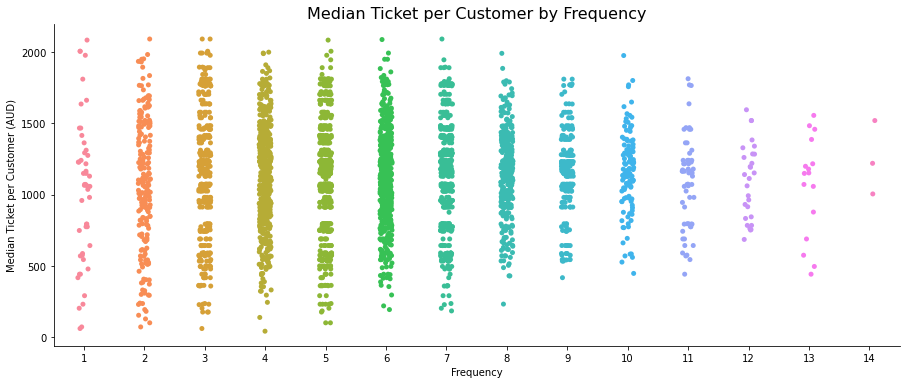

In [26]:
# Median ticket by frequency
sns.catplot(x='frequency', y='med_ticket', data=metrics, aspect=2.5)

plt.title('Median Ticket per Customer by Frequency', fontsize=16)
plt.xlabel('Frequency')
plt.ylabel('Median Ticket per Customer (AUD)')
plt.show()

### Score Construction

In [27]:
# Bucket these metrics into 5 bins
metrics['R'] = pd.cut(metrics['recency'], bins=5, labels=[5,4,3,2,1]).astype(int)
metrics['F'] = pd.cut(metrics['frequency'], bins=5, labels=[1,2,3,4,5]).astype(int)
metrics['M'] = pd.cut(metrics['monetary'], bins=5, labels=[1,2,3,4,5]).astype(int)

In [28]:
rfm = ['R', 'F', 'M']
metrics[rfm]

,R,F,M
customer_id,,,
1,5,4,3
10,5,2,2
100,5,1,1
1000,5,4,3
1001,5,3,2
...,...,...,...
995,5,3,3
996,5,2,3
997,5,3,2


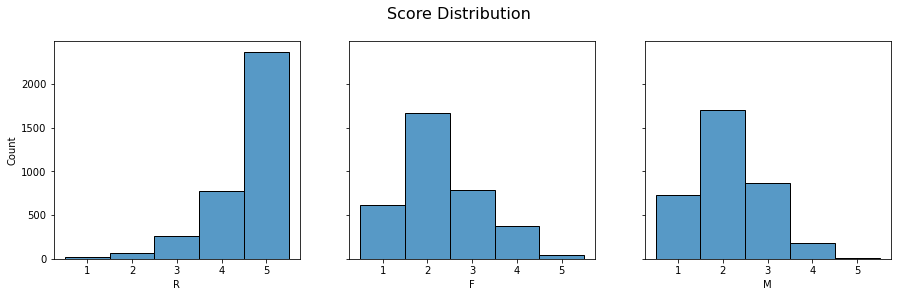

In [48]:
# Plot score distribution
fig, axes = plt.subplots(1,3, figsize=(15,4), sharey=True)
fig.suptitle('Score Distribution', y=1, fontsize=16)

sns.histplot(metrics['R'], discrete=True, ax=axes[0])
sns.histplot(metrics['F'], discrete=True, ax=axes[1])
sns.histplot(metrics['M'], discrete=True, ax=axes[2])
plt.show()

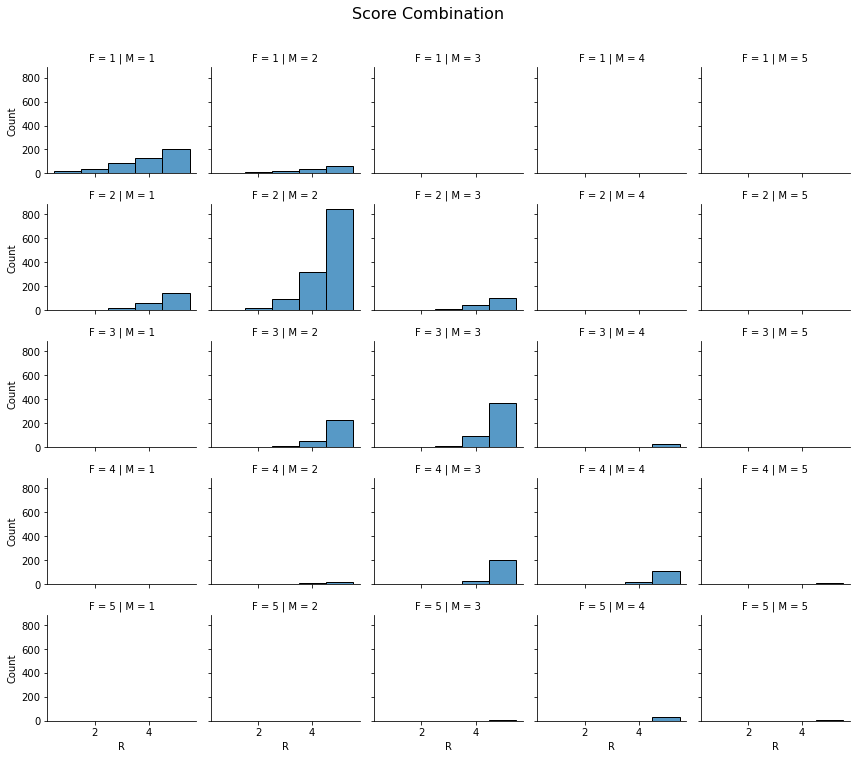

In [41]:
# Plot score combination distribution
g = sns.displot(x='R', col='M', row='F', data=metrics,
                discrete=True, aspect=1.2, height=2)
g.fig.suptitle('Score Combination', y=1.05, fontsize=16)
plt.show()

### Segmentation

Segment|Description|R|F|M
:--|:--|:--|:--|:--
Champions|Bought recently, buy often and spend the most|4 - 5|4 - 5|4 - 5
Loyal Customers|Spend good money. Responsive to promotions|2 - 4|3 - 4|4 - 5
Potential Loyalist|Recent customers, spent good amount, bought more than once|3 - 5|1 - 3|1 - 3
New Customers|Bought more recently, but not often|4 - 5|< 2|< 2
Promising|Recent shoppers, but haven’t spent much|3 - 4|< 2|< 2
Need Attention|Above average recency, frequency & monetary values|3 - 4|3 - 4|3 - 4
About To Sleep|Below average recency, frequency & monetary values|2 - 3|< 3|< 3
At Risk|Spent big money, purchased often but long time ago|< 3|2 - 5|2 - 5
Can’t Lose Them|Made big purchases and often, but long time ago|< 2|4 - 5|4 - 5
Hibernating|Low spenders, low frequency, purchased long time ago|2 - 3|2 - 3|2 - 3
Lost|Lowest recency, frequency & monetary scores|< 2|< 2|< 2

In [31]:
def rfm(r, f, m):
    """
    Return segment names according to each metric combination
    """
    if r in range(4,6) and f in range(4,6) and f in range(4,6):
        return 'Champions'
    elif r in range(2,5) and f in range(3,5) and f in range(4,6):
        return 'Loyal Customers'
    elif r in range(3,6) and f in range(1,4) and f in range(1,4):
        return 'Potential Loyalist'
    elif r in range(4,6) and f in range(0,3) and f in range(0,3):
        return 'New customers'
    elif r in range(3,5) and f in range(0,3) and f in range(0,3):
        return 'Promising'
    elif r in range(3,5) and f in range(3,5) and f in range(3,5):
        return 'Need Attention'
    elif r in range(2,4) and f in range(0,2) and f in range(0,2):
        return 'About to Sleep' 
    elif r in range(0,4) and f in range(2,6) and f in range(2,6):
        return 'At Risk'
    elif r in range(0,2) and f in range(4,6) and f in range(4,6):
        return "Can’t Lose Them"
    elif r in range(2,4) and f in range(2,4) and f in range(2,4):
        return 'Hibernating'
    elif r in range(0,2) and f in range(0,2) and f in range(0,2):
        return 'Lost'

In [32]:
# Apply rfm function
metrics['rfm_segment'] = np.vectorize(rfm)(metrics['R'], metrics['F'], metrics['M'])

In [33]:
metrics['rfm_segment'].value_counts()

Potential Loyalist    2976
Champions              426
About to Sleep          49
Lost                    22
At Risk                 21
Name: rfm_segment, dtype: int64

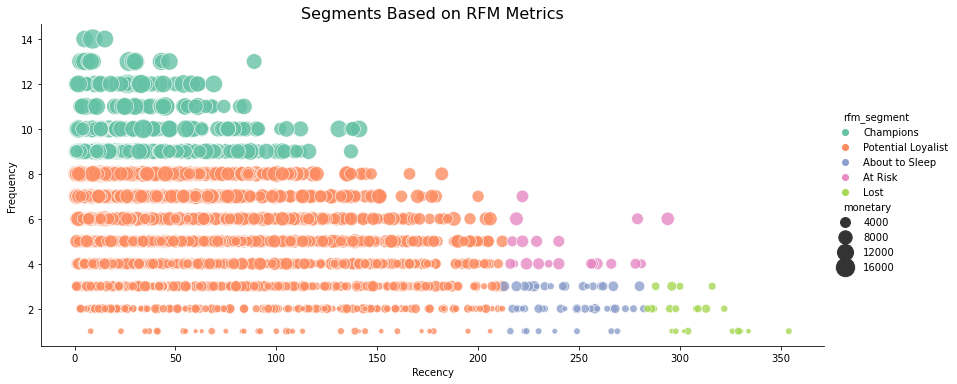

In [34]:
# Plot all segments by frequency and recency, sized by monetary and colored by segment
sns.relplot(data=metrics, x='recency', y='frequency', size='monetary',
            hue='rfm_segment', sizes=(20, 400), palette='Set2',
            alpha=.8, aspect=2.3)

plt.title('Segments Based on RFM Metrics', fontsize=16)
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()